# Check if the customer will cancel the hotel booking

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\programs\ML\Projects\Hotel Booking\hotel_bookings.csv")

In [3]:
#df.isnull().sum()
#type(df)
#df.size
#df.shape

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### Data Cleaning

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.drop(['agent','company'], axis=1, inplace=True)

In [7]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
VGB        1
AIA        1
ASM        1
DMA        1
MLI        1
Name: country, Length: 177, dtype: int64

In [8]:
df['country'].value_counts().index[0]

'PRT'

In [9]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [10]:
df.fillna(0,inplace=True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### check if number of adult children and babies are more than 0 for the booking

In [12]:
filter1=(df['adults']==0) & (df['children']==0) & (df['babies']==0)
filter1

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [13]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [14]:
df.shape

(119390, 30)

In [15]:
data=df[~filter1]

In [16]:
data.shape

(119210, 30)

## Analysing the data

### 1. Where do the guest came from?

In [17]:
data['is_canceled'].unique() # two types of booking 0-> canceled 1-> not canceled

array([0, 1], dtype=int64)

In [18]:
data[data['is_canceled']==0]['country'].value_counts()

PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
NAM        1
BDI        1
MRT        1
BHS        1
MLI        1
Name: country, Length: 165, dtype: int64

In [19]:
data[data['is_canceled']==1]['country'].value_counts()

PRT    27563
GBR     2452
ESP     2177
FRA     1933
ITA     1333
       ...  
MCO        1
CRI        1
GNB        1
NIC        1
FJI        1
Name: country, Length: 127, dtype: int64

In [20]:
len(data[data['is_canceled']==0])

75011

In [21]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,NAM,1
161,BDI,1
162,MRT,1
163,BHS,1


In [43]:
# !pip install plotly

In [44]:
# !pip install chart_studio

In [24]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [25]:
import plotly.express as px

In [26]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guests'],
              hover_name=country_wise_data['country'],
              title='home country of guests'
             )

In [27]:
map_guest.show()

### 2. How much do guests pay per night

In [28]:
data2=data[data['is_canceled']==0]

In [29]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

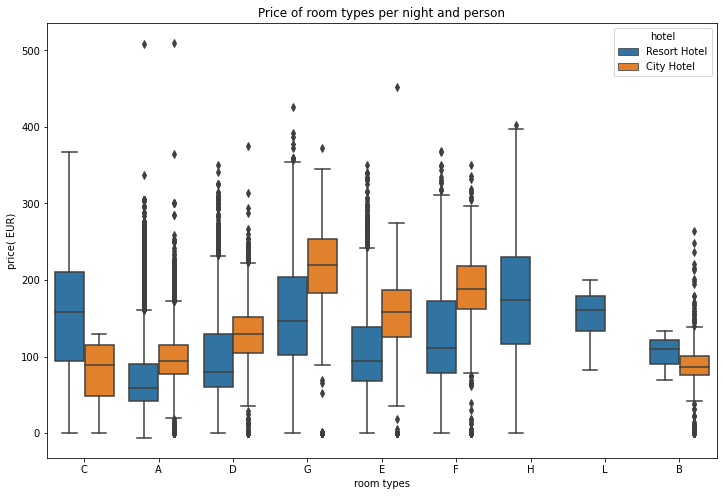

In [30]:
# Seaborn plot
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2)
plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

### 3. Which are the most busy month

In [31]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
data_resort=data[(data['is_canceled']==0) & (data['hotel']=='Resort Hotel')]
data_city=data[(data['is_canceled']==0) & (data['hotel']=='City Hotel')]

In [33]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [34]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['Month','no_of_guests']
rush_resort

,Month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [35]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['Month','no_of_guests']
rush_city

,Month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [36]:
final_rush=rush_resort.merge(rush_city, on='Month')
final_rush.columns = ['Month', 'no_of_guest_in_resort','number_of_guests_in_city']
final_rush

,Month,no_of_guest_in_resort,number_of_guests_in_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [45]:
#!pip install sorted-months-weekdays

## Dependency package needs to be installed
# !pip install sort_dataframeby_monthorweek

In [38]:
import sort_dataframeby_monthorweek as sd

In [39]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'Month')

<AxesSubplot:xlabel='Month'>

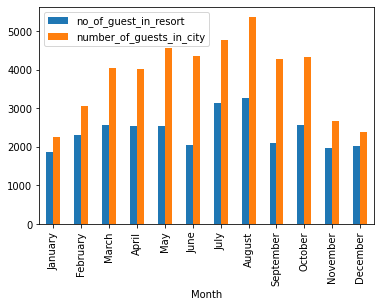

In [40]:
#px.line(data_frame=final_rush,x='Month',y=['no_of_guest_in_resort','number_of_guests_in_city'])
final_rush.plot(x='Month',y=['no_of_guest_in_resort','number_of_guests_in_city'], kind='bar')

### 4. Which month has highest adr (average daily rate)

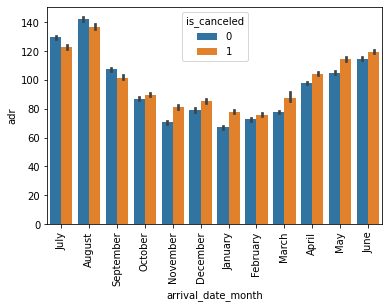

In [41]:
sns.barplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

### Where the bookings were made for weekday or weekend or for both?

In [42]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [46]:
###### Relationship table 
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
##### function for weekend or weekday stay
def week_function(row):
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if row[feature1]==0 and row[feature2]>0:
        return 'stay just week_days'
    elif row[feature1]>0 and row[feature2]==0:
        return 'stay just weekend_days'
    elif row[feature1]>0 and row[feature2]>0:
        return 'stay both week_days and weekends'
    else:
        return 'undefined_data'

In [57]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
data2.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay just week_days


In [59]:
data2['weekend_or_weekday'].value_counts()

stay both week_days and weekends    37551
stay just week_days                 31788
stay just weekend_days               5050
undefined_data                        622
Name: weekend_or_weekday, dtype: int64

In [60]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [61]:
data2.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,stay just week_days
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,stay just week_days
2,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016,stay just week_days


In [63]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday              
April               stay both week_days and weekends    3627
                    stay just week_days                 2559
                    stay just weekend_days               344
                    undefined_data                        30
August              stay both week_days and weekends    4929
                    stay just week_days                 3137
                    stay just weekend_days               509
                    undefined_data                        49
December            stay both week_days and weekends    1901
                    stay just week_days                 2123
                    stay just weekend_days               298
                    undefined_data                        69
February            stay both week_days and weekends    2438
                    stay just week_days                 2514
                    stay just weekend_days               360
                    undefined_da

In [65]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [66]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [68]:
sorted_data.set_index('arrival_date_month', inplace=True)

In [69]:
sorted_data

,stay both week_days and weekends,stay just week_days,stay just weekend_days,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

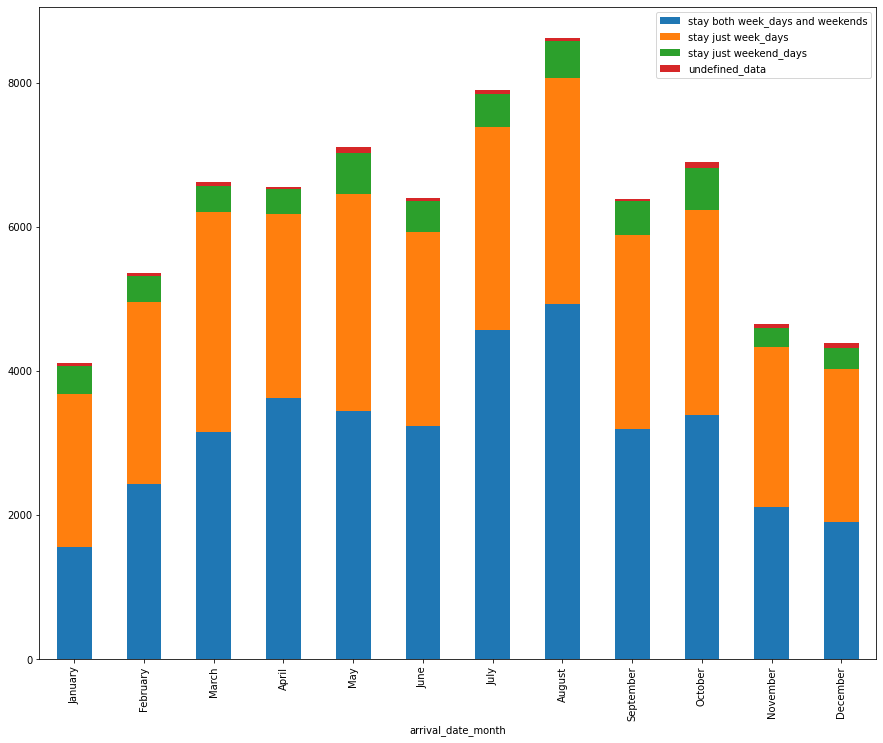

In [73]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,12))

# Creating Some more features

In [79]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [80]:
def family(row):
    if (row['adults']>0) and (row['children']>0 or row['babies']>0):
        return 1
    return 0

In [81]:
data['is_family']=data.apply(family,axis=1)

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
data['total_customer']=data['adults']+data['children']+data['babies']

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
data['total_nights']=data['stays_in_week_nights']+data['stays_in_weekend_nights']

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
data[data['is_family']==1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,0,Transient,154.77,0,1,Check-Out,7/5/2015,1,3.0,4
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,...,0,Transient,153.00,0,0,Canceled,6/2/2015,1,4.0,7
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,0,Transient,107.00,1,2,Check-Out,7/3/2015,1,4.0,1
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,0,Transient,153.00,1,0,Check-Out,7/5/2015,1,4.0,2
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,...,0,Transient,108.73,0,2,Canceled,4/15/2015,1,3.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,August,35,29,0,3,2,...,0,Transient,135.00,0,2,Check-Out,9/1/2017,1,3.0,3
119287,City Hotel,0,167,2017,August,35,27,2,4,2,...,0,Transient,177.75,0,0,Check-Out,9/2/2017,1,3.0,6
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,0,Transient,189.00,0,3,Check-Out,9/2/2017,1,4.0,3
119318,City Hotel,0,160,2017,August,35,29,0,5,2,...,0,Transient,153.90,0,0,Check-Out,9/3/2017,1,3.0,5


In [91]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [92]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}

In [93]:
data['deposite_given']=data['deposit_type'].map(dict1)

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposite_given'],
      dtype='object')

In [95]:
data.drop(columns=['adults','children','babies','deposit_type'],axis=1,inplace=True)

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposite_given'],
      dtype='object')

# Feature encoding

In [98]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposite_given
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2,0


In [99]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [101]:
#### we need all the data in int or float so converting non int data to int 
#### non int data is called categorical data
cate_feature = [col for col in data.columns if data[col].dtypes=='object']

In [102]:
cate_feature

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [103]:
data_cat=data[cate_feature]

In [104]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015


In [105]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [106]:
data_cat['cancellation']=data['is_canceled']

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
data_cat.head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,0


In [109]:
cols=data_cat.columns

In [110]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [112]:
for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

c:\users\nikki\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.800000,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,0.800000,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0,0.985075,0
